In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [18]:
two_wheeler_data = pd.read_csv('Electric 2-Wheeler Sales.csv', skiprows=1)
three_wheeler_data = pd.read_csv('Electric 3-Wheeler Sales .csv', skiprows=1)
four_wheeler_data = pd.read_csv('Electric 4-Wheeler Sales.csv', skiprows=1)
bus_data = pd.read_csv('Electric Bus Sales .csv', skiprows=1)
two_wheeler_data['Vehicle_Type'] = 'Two Wheeler'
three_wheeler_data['Vehicle_Type'] = 'Three Wheeler'
four_wheeler_data['Vehicle_Type'] = 'Four Wheeler'
bus_data['Vehicle_Type'] = 'Bus'

combined_data = pd.concat([two_wheeler_data, three_wheeler_data, four_wheeler_data, bus_data], ignore_index=True)


combined_data_numeric = combined_data.select_dtypes(include='number')


imputer = SimpleImputer(strategy='mean') 
imputed_data = imputer.fit_transform(combined_data_numeric)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
combined_data['Cluster'] = cluster_labels

# Analyze the segments for each vehicle type
for vehicle_type in combined_data['Vehicle_Type'].unique():
    print(f"Analysis for {vehicle_type}:")
    vehicle_data = combined_data[combined_data['Vehicle_Type'] == vehicle_type]
    cluster_counts = vehicle_data['Cluster'].value_counts()
    print("Cluster Counts:")
    print(cluster_counts)
   


C:\Users\Aarcturus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aarcturus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Analysis for Two Wheeler:
Cluster Counts:
Cluster
0    4
2    2
1    2
Name: count, dtype: int64
Analysis for Three Wheeler:
Cluster Counts:
Cluster
2    4
0    3
1    1
Name: count, dtype: int64
Analysis for Four Wheeler:
Cluster Counts:
Cluster
0    6
2    2
Name: count, dtype: int64
Analysis for Bus:
Cluster Counts:
Cluster
0    7
2    1
Name: count, dtype: int64


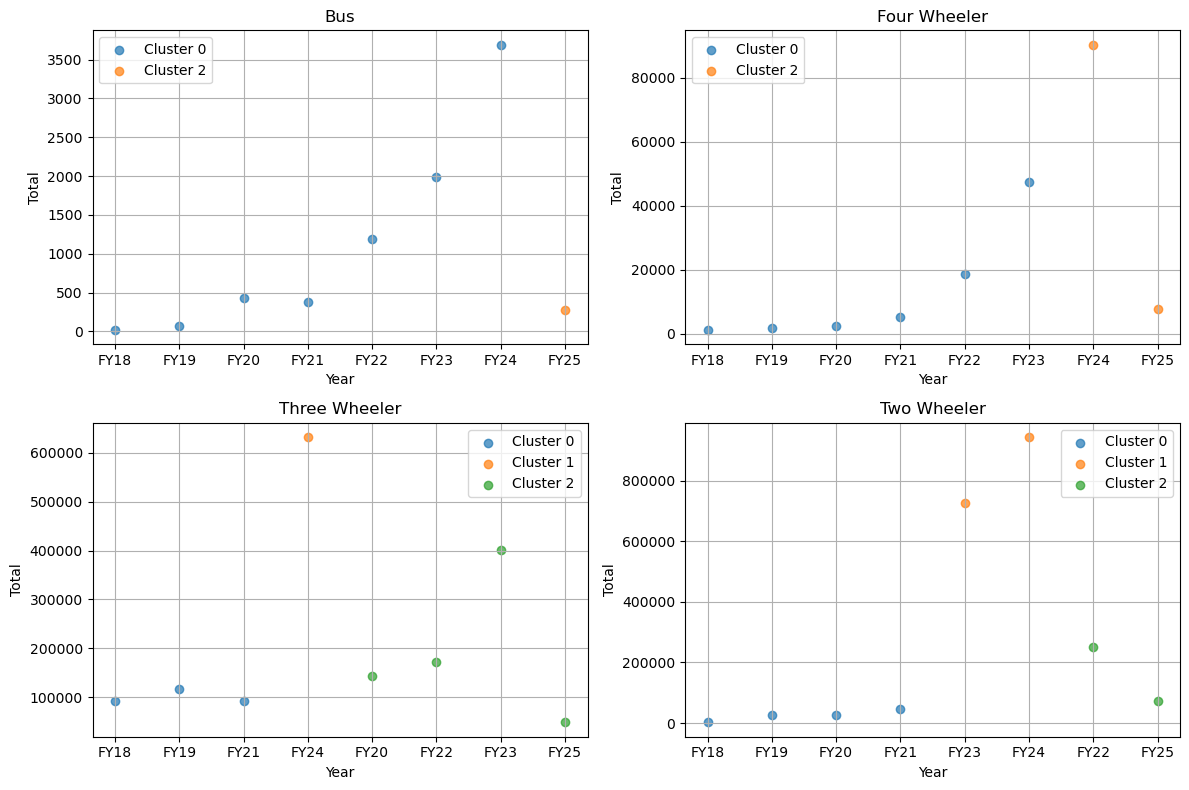

In [19]:
# Create a scatter plot to visualize cluster distribution for each vehicle type
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, (vehicle_type, group) in enumerate(combined_data.groupby('Vehicle_Type')):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    for cluster_label, cluster_group in group.groupby('Cluster'):
        ax.scatter(cluster_group['Year'], cluster_group['Total'], label=f'Cluster {cluster_label}', alpha=0.7)
    ax.set_title(vehicle_type)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

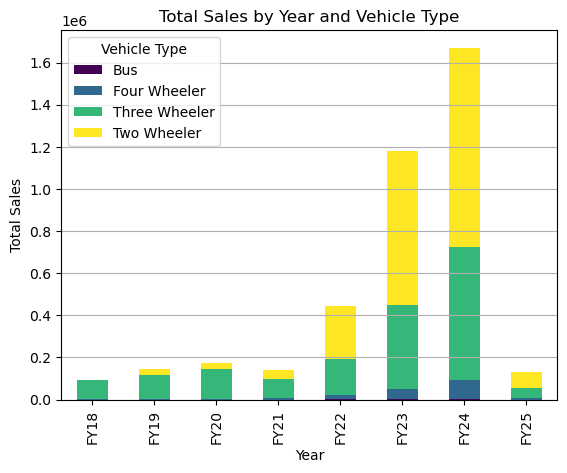

In [20]:
# Load and concatenate all datasets
two_wheeler_data = pd.read_csv('Electric 2-Wheeler Sales.csv', skiprows=1)
three_wheeler_data = pd.read_csv('Electric 3-Wheeler Sales .csv', skiprows=1)
four_wheeler_data = pd.read_csv('Electric 4-Wheeler Sales.csv', skiprows=1)
bus_data = pd.read_csv('Electric Bus Sales .csv', skiprows=1)


two_wheeler_data['Vehicle_Type'] = 'Two Wheeler'
three_wheeler_data['Vehicle_Type'] = 'Three Wheeler'
four_wheeler_data['Vehicle_Type'] = 'Four Wheeler'
bus_data['Vehicle_Type'] = 'Bus'
all_datasets = pd.concat([two_wheeler_data, three_wheeler_data, four_wheeler_data, bus_data], ignore_index=True)


sales_by_year_vehicle_type = all_datasets.groupby(['Year', 'Vehicle_Type'])['Total'].sum().unstack()

# Plotting the bar graph
plt.figure(figsize=(12, 8))
sales_by_year_vehicle_type.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Total Sales by Year and Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.legend(title='Vehicle Type')
plt.show()

In [21]:
bd = pd.read_csv('behavioural_dataset.csv')

In [22]:
bd

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000


In [23]:
print(bd.describe())

             Age  No of Dependents  Total Salary         Price
count  99.000000         99.000000  9.900000e+01  9.900000e+01
mean   36.313131          2.181818  2.270707e+06  1.194040e+06
std     6.246054          1.335265  1.050777e+06  4.376955e+05
min    26.000000          0.000000  2.000000e+05  1.100000e+05
25%    31.000000          2.000000  1.550000e+06  8.000000e+05
50%    36.000000          2.000000  2.100000e+06  1.200000e+06
75%    41.000000          3.000000  2.700000e+06  1.500000e+06
max    51.000000          4.000000  5.200000e+06  3.000000e+06


In [24]:
print(bd['Total Salary'].unique())

bd['Total Salary'] = bd['Total Salary'].replace('[\$,]', '', regex=True)

bd['Total Salary'] = pd.to_numeric(bd['Total Salary'], errors='coerce')

print(bd['Total Salary'].isna().sum())
bd['Total Salary'].fillna(bd['Total Salary'].median(), inplace=True)  # Replace NaNs with the median salary
bd['Personal loan'] =bd['Personal loan'].map({'Yes': 1, 'No': 0})

print(bd['Total Salary'].dtypes)
print(bd['Total Salary'].head())

print(bd.describe())




[ 800000 2000000 1800000 2200000 2600000  900000 1400000 1900000 1700000
 1300000 4500000 2500000 2400000 2900000 1600000 2700000 1100000 2100000
 3000000 3700000 2300000 3600000  200000 3100000 4300000 3800000 4700000
 1200000 1500000 4000000 3200000 5200000 4100000 4900000 2800000 5100000]
0
int64
0     800000
1    2000000
2    1800000
3    2200000
4    2600000
Name: Total Salary, dtype: int64
             Age  No of Dependents  Personal loan  Total Salary         Price
count  99.000000         99.000000      99.000000  9.900000e+01  9.900000e+01
mean   36.313131          2.181818       0.323232  2.270707e+06  1.194040e+06
std     6.246054          1.335265       0.470091  1.050777e+06  4.376955e+05
min    26.000000          0.000000       0.000000  2.000000e+05  1.100000e+05
25%    31.000000          2.000000       0.000000  1.550000e+06  8.000000e+05
50%    36.000000          2.000000       0.000000  2.100000e+06  1.200000e+06
75%    41.000000          3.000000       1.000000  2.70

C:\Users\Aarcturus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aarcturus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aarcturus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aarcturus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

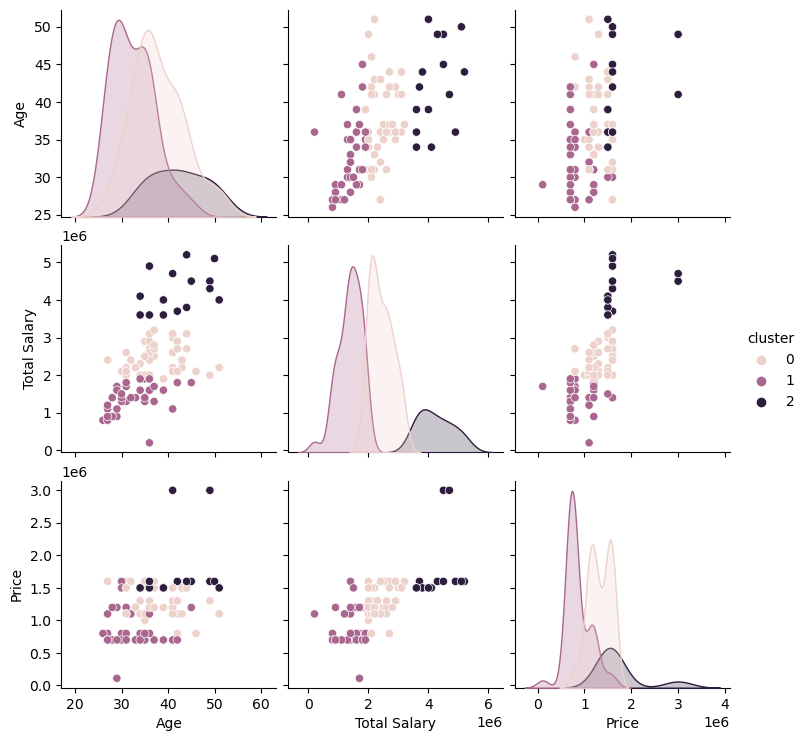

In [26]:
# K-Means Clustering
bd = pd.read_csv('behavioural_dataset.csv')
kmeans = KMeans(n_clusters=3)
bd['cluster'] = kmeans.fit_predict(bd[['Age', 'Total Salary', 'Price']])
# Visualize clusters
sns.pairplot(bd, hue='cluster', vars=['Age', 'Total Salary', 'Price'])
plt.show()


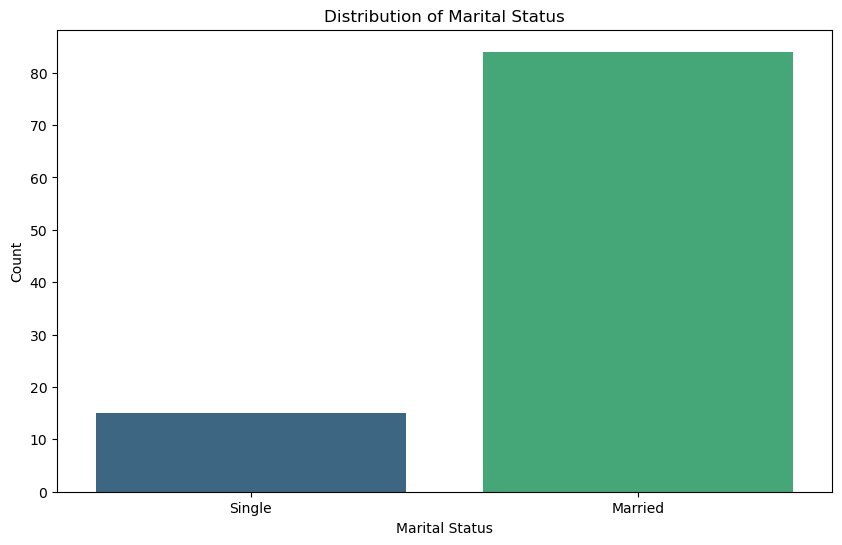

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=bd, x='Marrital Status', palette='viridis')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

C:\Users\Aarcturus\AppData\Local\Temp\ipykernel_29436\3402750472.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cars_by_age_group = bd.groupby('Age_group')['Price'].count()


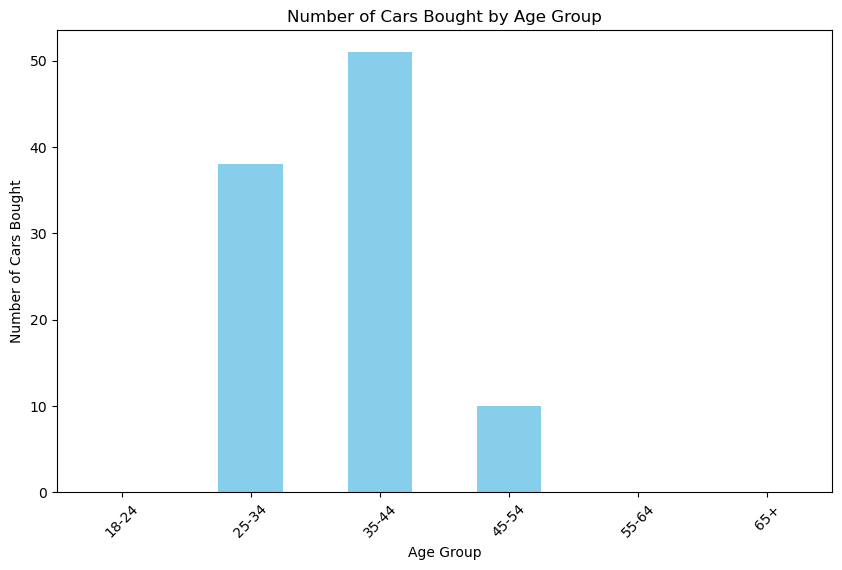

In [14]:
bd = pd.read_csv('behavioural_dataset.csv')
bd['Total Salary'] = bd['Total Salary'].replace('[\$,]', '', regex=True)
bd['Total Salary'] = pd.to_numeric(bd['Total Salary'], errors='coerce')
bd['Price'] = pd.to_numeric(bd['Price'], errors='coerce')

# Handle missing values
bd['Total Salary'].fillna(bd['Total Salary'].median(), inplace=True)  # Replace NaNs with the median salary
bd['Price'].fillna(bd['Price'].median(), inplace=True)  # Replace NaNs with the median car price

# Create Age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bd['Age_group'] = pd.cut(bd['Age'], bins=bins, labels=labels, right=False)

# Calculate the number of cars bought by each age group
cars_by_age_group = bd.groupby('Age_group')['Price'].count()

# Plot the bar graph
plt.figure(figsize=(10, 6))
cars_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Number of Cars Bought by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cars Bought')
plt.xticks(rotation=45)
plt.show()


Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price'],
      dtype='object')


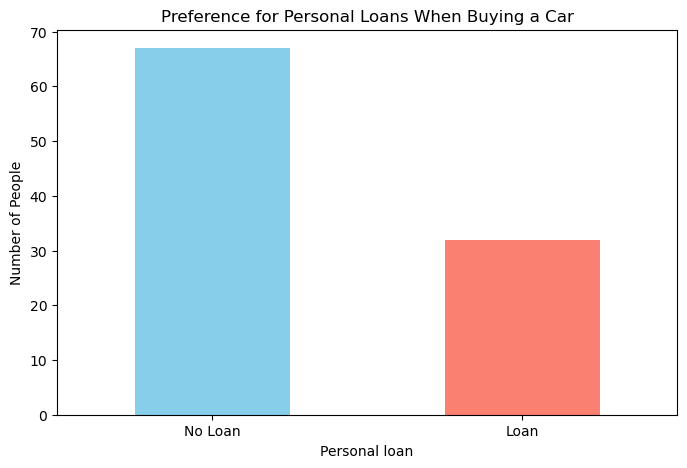

In [16]:
# Remove currency symbols and commas from the Total Salary column if present
bd['Total Salary'] = bd['Total Salary'].replace('[\$,]', '', regex=True)

bd['Total Salary'] = pd.to_numeric(bd['Total Salary'], errors='coerce')

# Convert Price to float
bd['Price'] = pd.to_numeric(bd['Price'], errors='coerce')

# Handle missing values
bd['Total Salary'].fillna(bd['Total Salary'].median(), inplace=True)  # Replace NaNs with the median salary
bd['Price'].fillna(bd['Price'].median(), inplace=True)  # Replace NaNs with the median car price

# Verify the column names
print(bd.columns)

# Assuming the column for personal loan is 'Personal Loan' and is a boolean
# Calculate the number of people who prefer loans for buying a car
loan_preference = bd['Personal loan'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 5))
loan_preference.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Preference for Personal Loans When Buying a Car')
plt.xlabel('Personal loan')
plt.ylabel('Number of People')
plt.xticks(ticks=[0, 1], labels=['No Loan', 'Loan'], rotation=0)
plt.show()


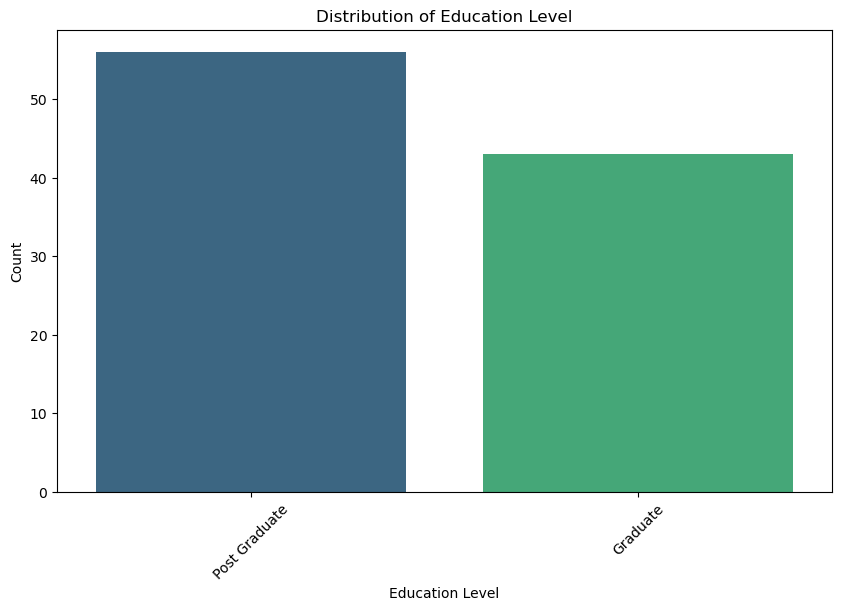

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=bd, x='Education', palette='viridis')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Aarcturus\AppData\Local\Temp\ipykernel_29436\2705200494.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=bd, x='Total Salary', y='Price', palette='viridis')


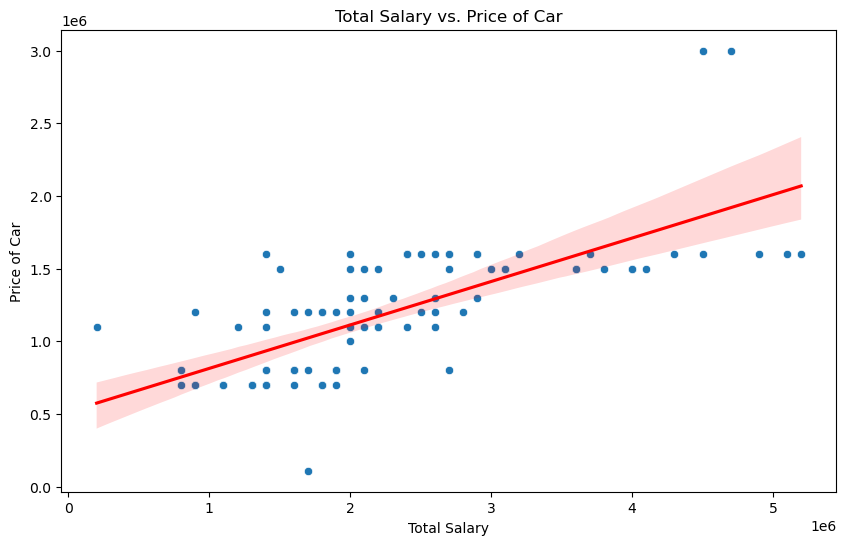

In [36]:
# Plot the scatter plot for Total Salary vs. Price of Car
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bd, x='Total Salary', y='Price', palette='viridis')

# Add a regression line
sns.regplot(data=bd, x='Total Salary', y='Price', scatter=False, color='red')

plt.title('Total Salary vs. Price of Car')
plt.xlabel('Total Salary')
plt.ylabel('Price of Car')
plt.show()